<a href="https://colab.research.google.com/github/ABCutter/Cohort-18-Projects/blob/main/Project_2_Housing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


##Problem Definition
This is a supervised learning problem with a continuous variable target of house sales price. The goal is to perform a regression analysis with the minimum number of viable variables to reasonably predict house sales price, while reducing RMSPE.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from tabulate import tabulate

In [2]:
!curl -s -L -O https://raw.githubusercontent.com/ABCutter/autotools/refs/heads/main/metadata.py #Copy of Robert's metadata program copied to my GitHub repo and imported
import metadata
from metadata import cols_to_drop
from metadata import likely_ids

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [4]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [5]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge

In [6]:
#ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

##Data Collection/Sources

In [7]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/'
train_path = base_path + 'Housing.Data.csv'

##Data Cleaning

In [8]:
train_orig = pd.read_csv(train_path)
#train_orig.head()

In [9]:
#train_orig

In [133]:
meta = metadata.metadata(train_orig) #Metadata report
meta

,Data_types,Count,Nulls,Nulls_pct,Memory,NUnique,NUnique_pct,count,unique,top,...,mean,std,min,Q1_25%,Q2_median,Q3_75%,max,IRQ,range,sum
PID,int64,2637,0,0.0,21096,2637,100.0,2637,NaN,NaN,...,714130147.70383,188752674.750322,526301100.0,528477010.0,535453040.0,907187010.0,1007100110.0,378710000.0,480799010.0,1883161199495.0
MS SubClass,int64,2637,0,0.0,21096,16,0.6,2637,NaN,NaN,...,57.349261,42.499091,20.0,20.0,50.0,70.0,190.0,50.0,170.0,151230.0
MS Zoning,object,2637,0,0.0,155728,7,0.3,2637,7,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,float64,2637,449,17.0,21096,126,4.8,2188,NaN,NaN,...,69.166819,23.356779,21.0,58.0,68.0,80.0,313.0,22.0,292.0,151337.0
Lot Area,int64,2637,0,0.0,21096,1799,68.2,2637,NaN,NaN,...,10044.694729,6742.549521,1300.0,7436.0,9450.0,11526.0,164660.0,4090.0,163360.0,26487860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mo Sold,int64,2637,0,0.0,21096,12,0.5,2637,NaN,NaN,...,6.243838,2.722093,1.0,4.0,6.0,8.0,12.0,4.0,11.0,16465.0
Yr Sold,int64,2637,0,0.0,21096,5,0.2,2637,NaN,NaN,...,2007.795601,1.306403,2006.0,2007.0,2008.0,2009.0,2010.0,2.0,4.0,5294557.0
Sale Type,object,2637,0,0.0,158288,10,0.4,2637,10,WD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Condition,object,2637,0,0.0,166537,6,0.2,2637,6,Normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
drop_cols = cols_to_drop(train_orig) #Find likely columns to remove via >40% nulls
# drop_cols

In [12]:
likely_ids(train_orig) #Identify likely unique identifiers

,NUnique_pct
PID,100.0


In [13]:
train_copy = train_orig.copy() #safety measure for rollback

In [132]:
train_copy.shape

(2637, 81)

In [14]:
train_40 = train_copy.drop(columns = drop_cols)
# cols_to_drop(train_40)

{}

In [15]:
# train_40

In [16]:
meta_train = metadata.metadata(train_copy)

In [17]:
# meta_train

In [18]:
na_filter_05 = meta_train["Nulls_pct"] >= 5
drop_cols_05 = meta_train[ na_filter_05 ]["Nulls_pct"].to_dict()
train_05 = train_copy.drop(columns = drop_cols_05)
train_05 = train_05.drop(columns = 'PID')
meta_05 = metadata.metadata(train_05)
# meta_05

In [19]:
# train_05

In [20]:
unique_all05 = (train_05.nunique() / meta_05["Count"] * 100).round(1)
# sorted(unique_all05)

In [21]:
unique_25 = meta_05["NUnique_pct"][ meta_05["NUnique_pct"] <= 25 ].sort_values( ascending = False )
# unique_25

In [22]:
un_filter_25down = meta_05["NUnique_pct"] <= 25 #find and drop all columns <= 25% unique entries
drop_cols_un_25down = meta_05[ un_filter_25down ]["NUnique_pct"].to_dict()
train_05na_25uq = train_05.drop(columns = drop_cols_un_25down)
meta_05na_25uq = metadata.metadata(train_05na_25uq)
# meta_05na_25uq

In [23]:
train_05na_25uq_copy = train_05na_25uq.copy() #make a backup before converting float to int

In [24]:
# train_05na_25uq

In [25]:
train_05na_25uq.isna().sum()

,0
Lot Area,0
BsmtFin SF 1,1
Bsmt Unf SF,1
Total Bsmt SF,1
1st Flr SF,0
Gr Liv Area,0
SalePrice,0


In [26]:
# Apply value_counts to multiple columns
result = train_05na_25uq[['BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']].apply(pd.value_counts, result_type = 'reduce')
print(result)

BsmtFin SF 1     BsmtFin SF 1
0.0       840
24.0       23
16.0 ...
Bsmt Unf SF      Bsmt Unf SF
0.0       219
384.0      18
728.0 ...
Total Bsmt SF    Total Bsmt SF
0.0       72
864.0     69
768.0 ...
dtype: object


<ipython-input-26-1218788515>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  result = train_05na_25uq[['BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF']].apply(pd.value_counts, result_type = 'reduce')


In [27]:
print(f' Bsmt Unf SF mean = {train_05na_25uq["Bsmt Unf SF"].mean()},\n Bsmt Unf SF mode = {train_05na_25uq["Bsmt Unf SF"].mode()},\n Bsmt Unf SF median = {train_05na_25uq["Bsmt Unf SF"].median()}')

 Bsmt Unf SF mean = 555.6691957511381,
 Bsmt Unf SF mode = 0    0.0
Name: Bsmt Unf SF, dtype: float64,
 Bsmt Unf SF median = 464.5


In [28]:
print(f' Bsmt Unf SF mean = {train_05na_25uq["Bsmt Unf SF"].mean()},\n Bsmt Unf SF mode = {train_05na_25uq["Bsmt Unf SF"].mode()},\n Bsmt Unf SF median = {train_05na_25uq["Bsmt Unf SF"].median()}')

 Bsmt Unf SF mean = 555.6691957511381,
 Bsmt Unf SF mode = 0    0.0
Name: Bsmt Unf SF, dtype: float64,
 Bsmt Unf SF median = 464.5


In [29]:
print(f' BsmtFin SF 1 mean = {train_05na_25uq["BsmtFin SF 1"].mean()},\n BsmtFin SF 1 mode = {train_05na_25uq["BsmtFin SF 1"].mode()},\n BsmtFin SF 1 median = {train_05na_25uq["BsmtFin SF 1"].median()}')

 BsmtFin SF 1 mean = 438.4411987860395,
 BsmtFin SF 1 mode = 0    0.0
Name: BsmtFin SF 1, dtype: float64,
 BsmtFin SF 1 median = 368.0


In [30]:
print(f' Total Bsmt SF mean = {train_05na_25uq["Total Bsmt SF"].mean()},\n Total Bsmt SF mode = {train_05na_25uq["Total Bsmt SF"].mode()},\n Total Bsmt SF median = {train_05na_25uq["Total Bsmt SF"].median()}')

 Total Bsmt SF mean = 1045.1790591805766,
 Total Bsmt SF mode = 0    0.0
Name: Total Bsmt SF, dtype: float64,
 Total Bsmt SF median = 988.0


In [31]:
train_05na_25uq_int = train_05na_25uq.fillna(0).astype(int)

In [32]:
train_clean_int = train_05na_25uq_int

##Exporatory Data Analysis

In [33]:
train_clean_int_corr = train_clean_int.corr()

In [34]:
# train_clean_int_corr['SalePrice'].sort_values()

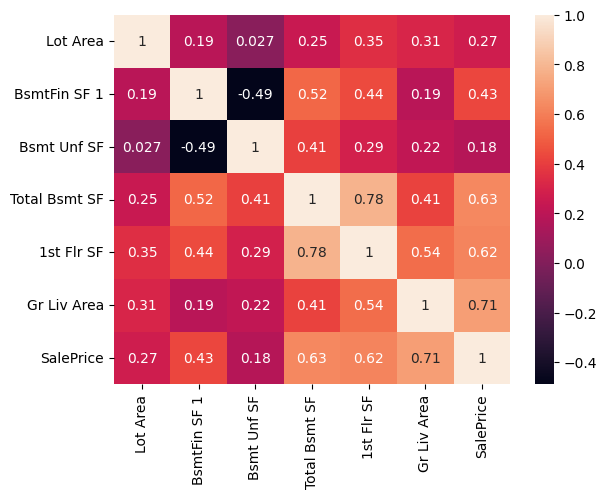

In [35]:
sns.heatmap(data=train_clean_int_corr, annot=True) ;

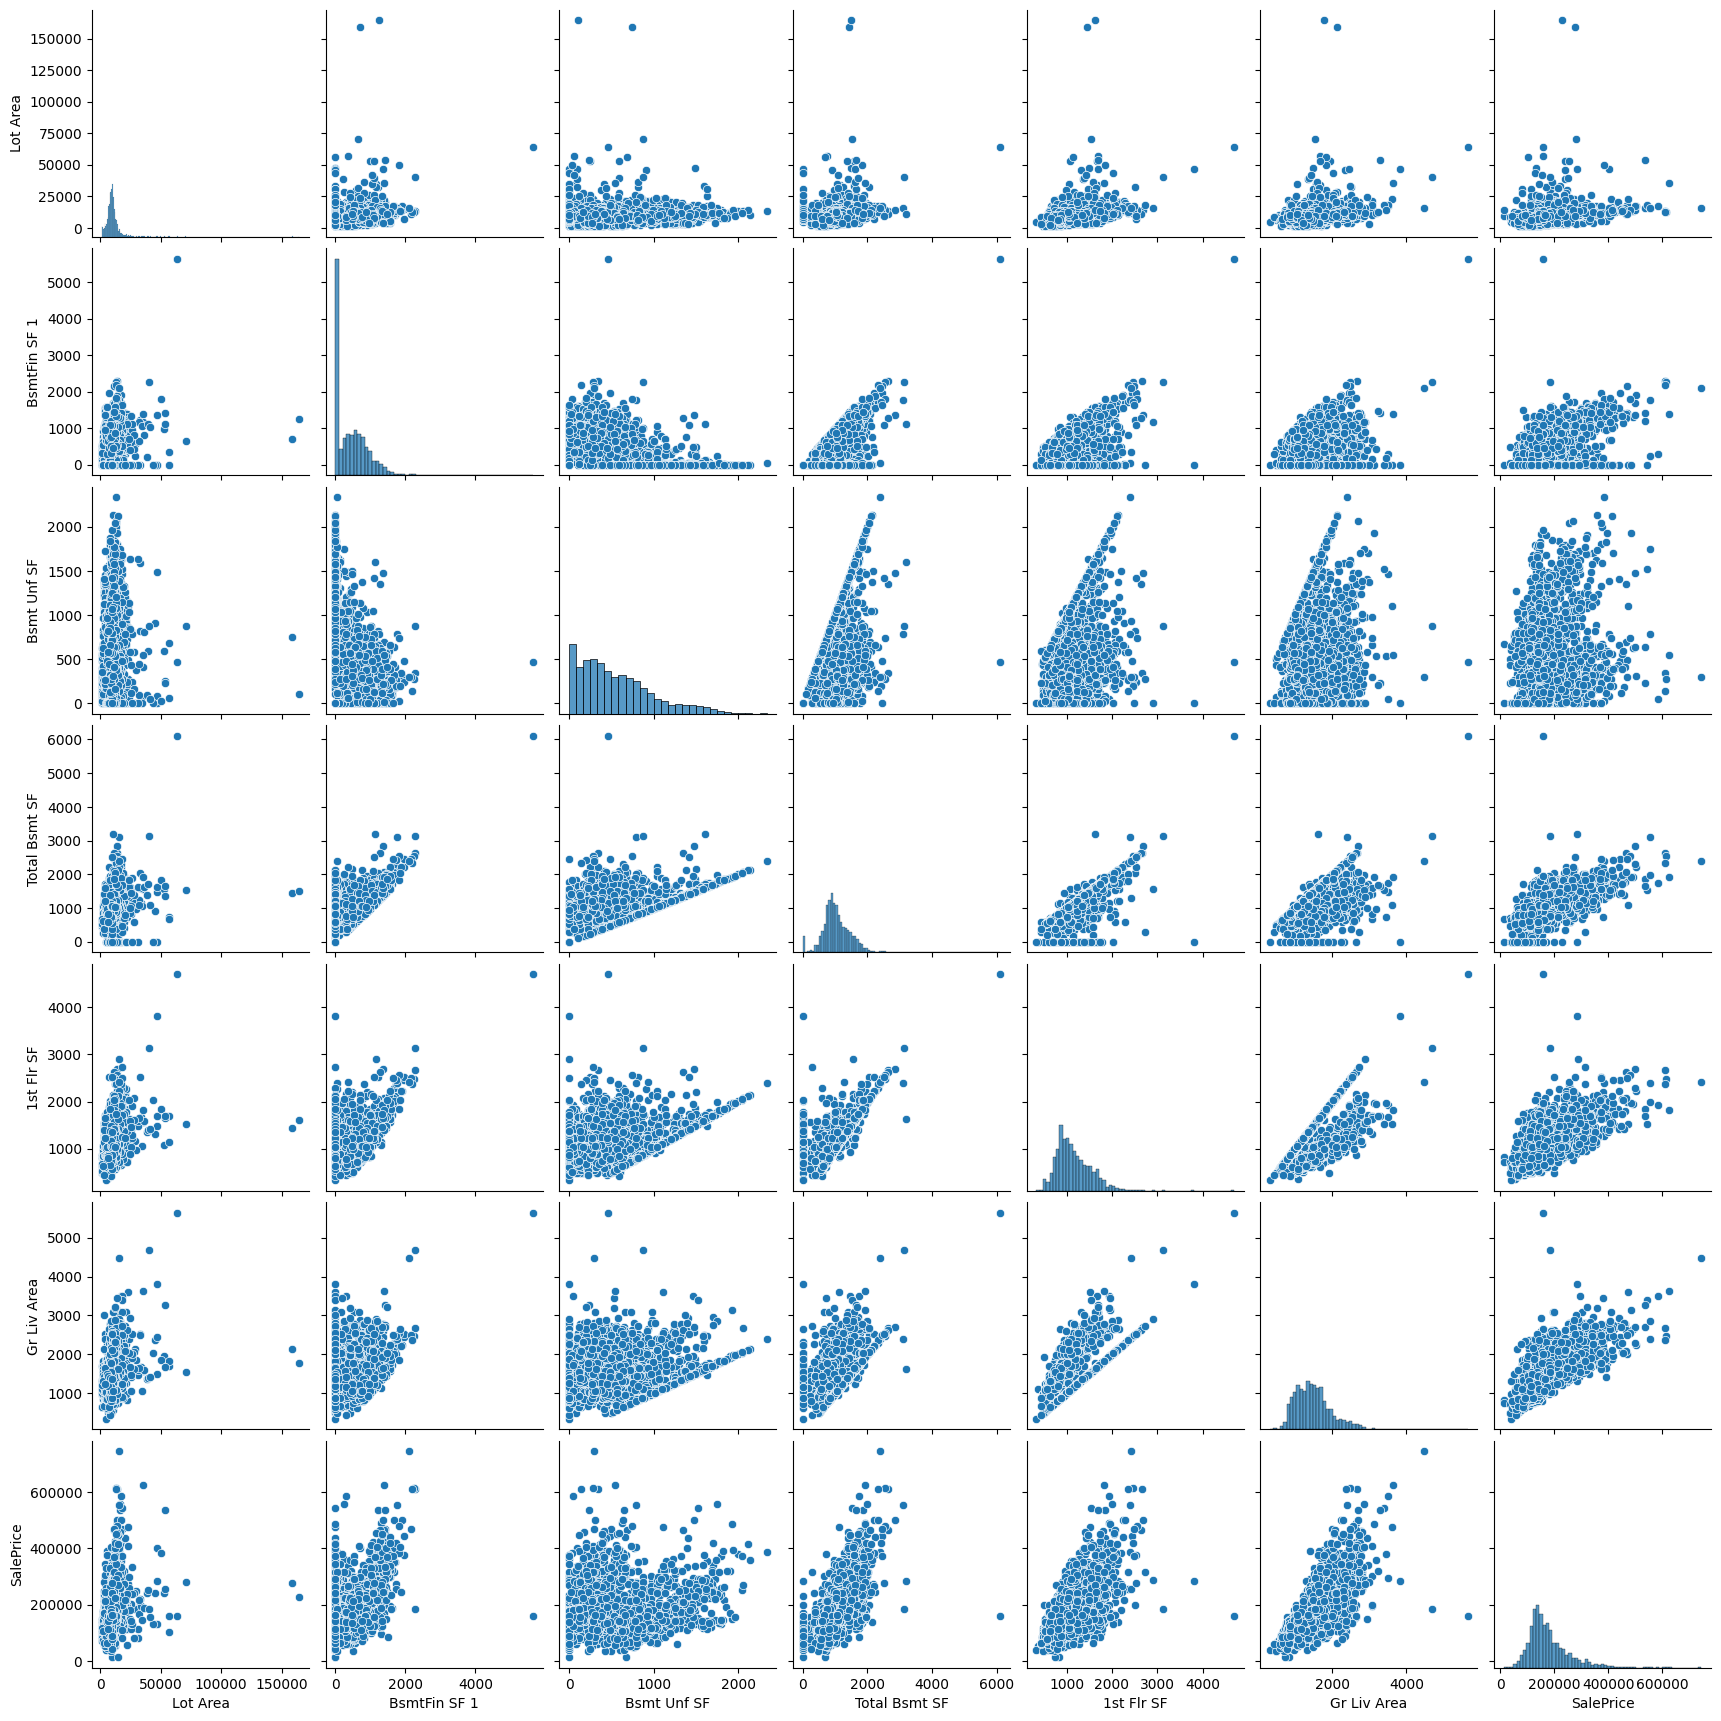

In [36]:
sns.pairplot(train_clean_int)

The Variance Inflation Factor (VIF) is a common method for detecting multicollinearity. VIF measures how much the variance of an estimated regression coefficient increases due to multicollinearity.
VIF = 1: No multicollinearity
1 < VIF < 5: Moderate multicollinearity
VIF >= 5: High multicollinearity
3. Python Implementation
Libraries: pandas for data handling and statsmodels for VIF calculation.

In [37]:
#Code adapted from Gemini recommendation
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    """Calculates VIF for each feature in a DataFrame."""
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Example Usage (assuming your data is in a pandas DataFrame called 'df'):
# Make sure you have only the independent variables in the DataFrame
independent_vars = train_clean_int[['Gr Liv Area', '1st Flr SF', 'Total Bsmt SF']]  # Replace with your column names
vif_results = calculate_vif(independent_vars)
print(vif_results)

         feature        VIF
0    Gr Liv Area  11.383941
1     1st Flr SF  28.301278
2  Total Bsmt SF  17.778086


4. Interpretation
Examine the "VIF" column in the output.
Features with a VIF greater than 5 (or sometimes 10, depending on the context) are considered to have high multicollinearity.
5. Addressing Multicollinearity
Remove: Drop one or more of the highly correlated variables.
Combine: Create new variables by combining correlated ones.
Regularization: Use techniques like Ridge or Lasso regression.
Additional Notes
VIF is most suitable for continuous variables.
Correlation matrices and heatmaps can also help identify multicollinearity, but VIF provides a more specific measure of its impact.

##Data Processing

In [38]:
#Restore for best un-reduced
# X = train_clean_int[[	'Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features
# y = train_clean_int['SalePrice']

In [39]:
#Best feature to RMSPE ratio
X = train_clean_int[['Gr Liv Area', 'Total Bsmt SF', 'BsmtFin SF 1']] # Example with multiple features
y = train_clean_int['SalePrice']

In [40]:
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [41]:
# Create an instance of the LinearRegression model.
# Use fit() to train the model on your training data.
model = LinearRegression()
myfit = model.fit(X_train, y_train)
( myfit.intercept_, myfit.coef_ )

(np.float64(-16732.534385195177),
 array([84.40054537, 56.00126118, 26.09572715]))

In [42]:
# Create a data frame with the results from the linear regression models
model_results_init = pd.DataFrame()
model_results_init['Predictor'] = X_train.columns
model_results_init['Linear'] = myfit.coef_
model_results_init.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results_init

,Predictor,Linear
0,Gr Liv Area,84.400545
1,Total Bsmt SF,56.001261
2,BsmtFin SF 1,26.095727


In [43]:
# Use predict() to make predictions on the test data.
y_pred = model.predict(X_test)

In [44]:
# # Use metrics like mean squared error (MSE) and R-squared to assess model performance.
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

In [45]:
# # You can access the coefficients (slopes) and intercept of the model:
# print(f'Coefficients: {model.coef_}')
# print(f'Intercept: {model.intercept_}')
# # The coefficients show the impact of each feature on the target variable, and the intercept is the value of the target when all features are zero.


##Data Visualization

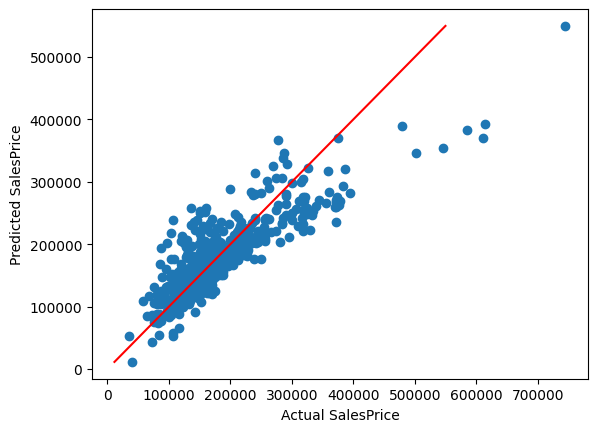

In [46]:
y_pred = myfit.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalesPrice')
plt.ylabel('Predicted SalesPrice') ;

In [47]:
# list(zip(y_test,y_pred))[:10]

In [48]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 44796.77256174892


In [49]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 25.55


In [50]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 46013.988600773235


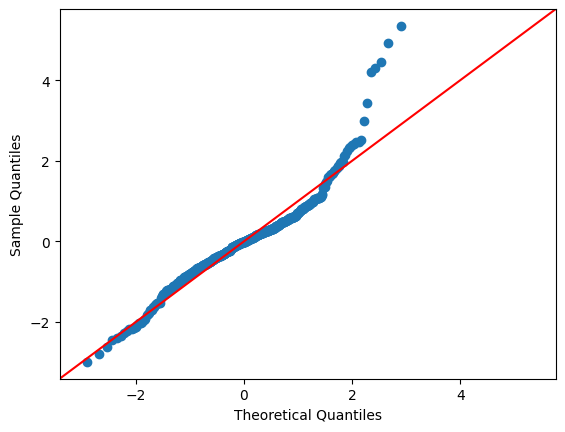

In [51]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

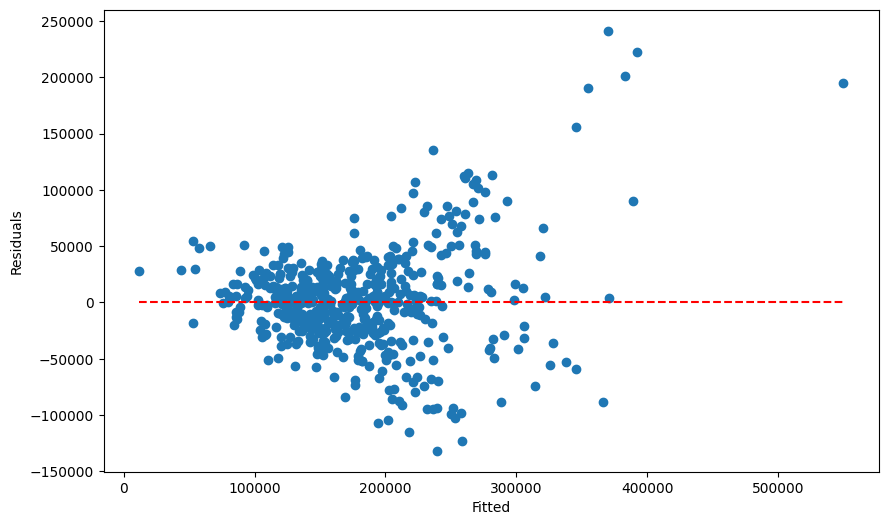

In [52]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

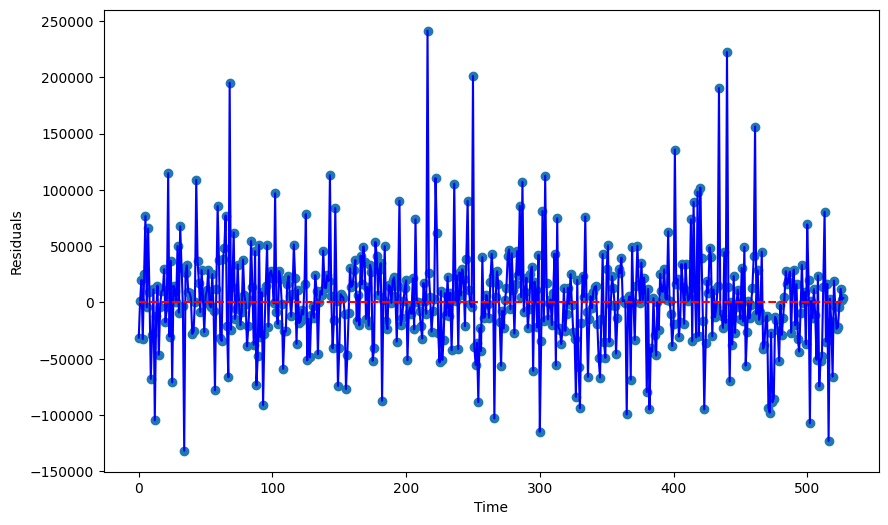

In [53]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

##Data Cleaning - Part 2

###Outlier Trimming

In [54]:
#The outliers in sales price look like a problem, so let's try to address that
def find_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [55]:
outlier_values = sorted(find_outliers(train_clean_int["SalePrice"]))
print(f"Outliers are: {outlier_values}")

Outliers are: [338500, 338931, 339750, 340000, 340000, 341000, 342000, 344133, 345000, 345000, 345000, 345474, 349265, 350000, 350000, 350000, 350000, 350000, 354000, 355000, 355000, 356000, 356383, 359100, 359900, 360000, 360000, 360000, 361919, 362500, 367294, 369900, 370000, 370878, 370967, 372000, 372397, 372402, 372500, 372500, 373000, 374000, 375000, 375000, 375000, 376162, 377426, 377500, 378000, 378500, 379000, 381000, 382500, 383000, 383970, 384500, 385000, 385000, 386250, 387000, 390000, 392000, 392000, 392500, 394432, 394617, 395000, 395039, 395192, 398800, 401179, 402000, 402861, 403000, 404000, 405000, 405749, 409900, 410000, 412083, 412500, 415000, 415298, 417500, 418000, 419005, 421250, 426000, 437154, 438780, 441929, 445000, 446261, 450000, 451950, 455000, 457347, 462000, 465000, 466500, 468000, 470000, 475000, 479069, 485000, 492000, 500000, 500067, 501837, 535000, 538000, 545224, 555000, 556581, 584500, 610000, 611657, 615000, 625000, 745000]


In [56]:
#Assisted by Gemini to create the drop logic, using the IQR values
def drop_outliers_iqr(df, column):
    """
    Identifies and drops outliers based on IQR.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    df_filtered = df.drop(outlier_indices)

    return df_filtered

In [57]:
train_outdrop = drop_outliers_iqr(train_clean_int, "SalePrice")

In [58]:
metadata.metadata(train_outdrop)

,Data_types,Count,Nulls,Nulls_pct,Memory,NUnique,NUnique_pct,count,mean,std,min,Q1_25%,Q2_median,Q3_75%,max,IRQ,range,sum
Lot Area,int64,2517,0,0.0,20136,1698,67.5,2517,9844.205801,6673.898354,1300.0,7314.0,9272.0,11235.0,164660.0,3921.0,163360.0,24777866.0
BsmtFin SF 1,int64,2517,0,0.0,20136,874,34.7,2517,408.984108,415.533620,0.0,0.0,350.0,697.0,5644.0,697.0,5644.0,1029413.0
Bsmt Unf SF,int64,2517,0,0.0,20136,1044,41.5,2517,549.429877,427.971681,0.0,216.0,461.0,798.0,2062.0,582.0,2062.0,1382915.0
Total Bsmt SF,int64,2517,0,0.0,20136,928,36.9,2517,1009.807708,398.319367,0.0,780.0,970.0,1240.0,6110.0,460.0,6110.0,2541686.0
1st Flr SF,int64,2517,0,0.0,20136,957,38.0,2517,1123.894716,353.239576,334.0,867.0,1062.0,1338.0,4692.0,471.0,4358.0,2828843.0
Gr Liv Area,int64,2517,0,0.0,20136,1139,45.3,2517,1455.272149,455.036234,334.0,1114.0,1418.0,1700.0,5642.0,586.0,5308.0,3662920.0
SalePrice,int64,2517,0,0.0,20136,878,34.9,2517,168916.736988,59013.754529,12789.0,128500.0,157000.0,201490.0,337500.0,72990.0,324711.0,425163427.0


In [59]:
outlier_values_lot = sorted(find_outliers(train_outdrop["Lot Area"]))
print(f"Outliers are: {outlier_values_lot}")

Outliers are: [1300, 17120, 17140, 17199, 17217, 17360, 17400, 17485, 17500, 17503, 17542, 17597, 17600, 17671, 17808, 17871, 17871, 17920, 17979, 18000, 18030, 18044, 18160, 18265, 18275, 18386, 18450, 18494, 18559, 18800, 18890, 19138, 19255, 19296, 19378, 19508, 19522, 19550, 19645, 19690, 19900, 19958, 20000, 20062, 20064, 20355, 20544, 20693, 20781, 21000, 21281, 21286, 21299, 21370, 21384, 21453, 21533, 21579, 21695, 21750, 21750, 21780, 21780, 21780, 21872, 21930, 22002, 22420, 22692, 23257, 23580, 23595, 23730, 24090, 24572, 24682, 25000, 25095, 25286, 25339, 25485, 26073, 26178, 26400, 27650, 27697, 28698, 29959, 31220, 31250, 31770, 32463, 32668, 33120, 33983, 34650, 35133, 36500, 39104, 39384, 40094, 41600, 43500, 45600, 47007, 47280, 53107, 53227, 56600, 57200, 63887, 70761, 159000, 164660]


In [60]:
train_outdrop_lot = drop_outliers_iqr(train_outdrop, "Lot Area")

In [61]:
X = train_outdrop_lot[['Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']

In [62]:
# X = train_outdrop_lot[['Gr Liv Area']] # Example with single feature (too focused)
# y = train_outdrop_lot['SalePrice']

In [63]:
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [64]:
# Create an instance of the LinearRegression model.
# Use fit() to train the model on your training data.
model = LinearRegression()
myfit = model.fit(X_train, y_train)
( myfit.intercept_, myfit.coef_ )

(np.float64(-8889.938897621061),
 array([ 1.26445937, 25.41274029,  0.67377522, 56.28777155, -9.55901878,
        75.31436788]))

In [65]:
# Use predict() to make predictions on the test data.
y_pred = model.predict(X_test)

In [66]:
# Use metrics like mean squared error (MSE) and R-squared to assess model performance.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1324322461.4455054
R-squared: 0.6090244975483521


In [67]:
# You can access the coefficients (slopes) and intercept of the model:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
# The coefficients show the impact of each feature on the target variable, and the intercept is the value of the target when all features are zero.


Coefficients: [ 1.26445937 25.41274029  0.67377522 56.28777155 -9.55901878 75.31436788]
Intercept: -8889.938897621061


###Outlier trim visualize

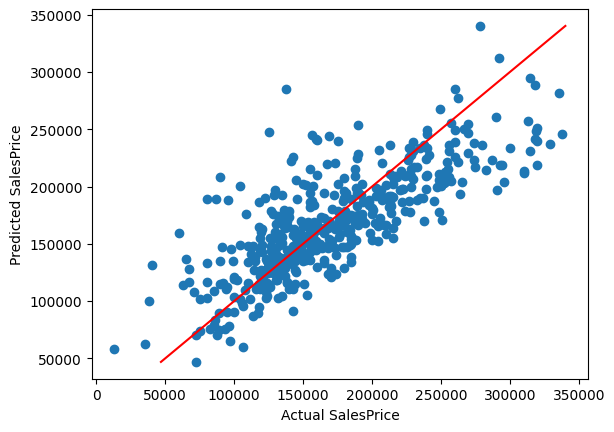

In [68]:
y_pred = myfit.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalesPrice')
plt.ylabel('Predicted SalesPrice') ;

In [69]:
# list(zip(y_test,y_pred))[:10]

In [70]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 36391.24154855816


In [71]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 33.04


In [72]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34992.5789338517


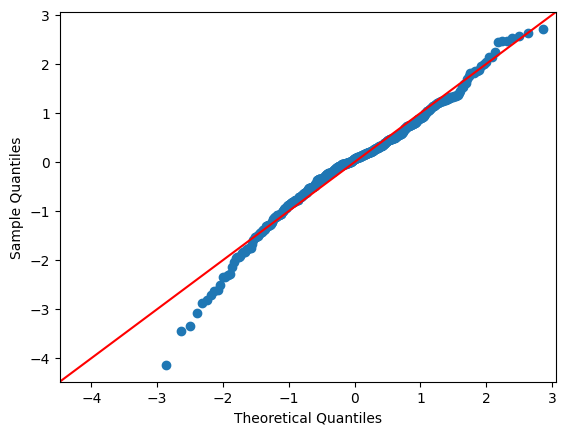

In [73]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

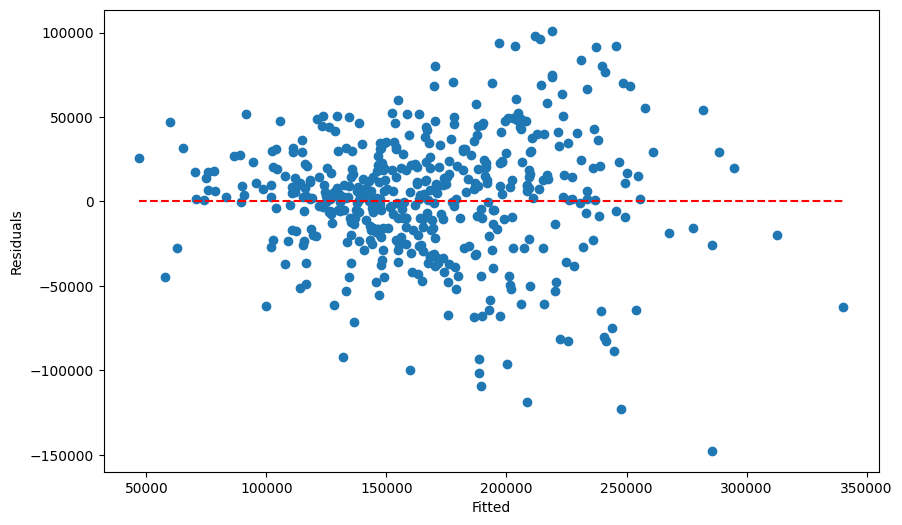

In [74]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

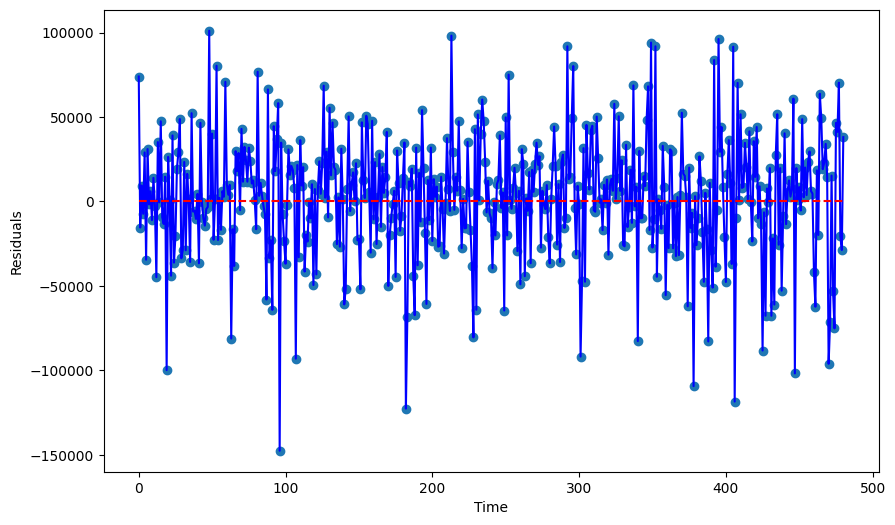

In [75]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

###Linear Regression

In [76]:
#Linear Regression top picks: 'Gr Liv Area', 'Total Bsmt SF', 'BsmtFin SF 1'
X = train_outdrop_lot[['Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']
scaler = StandardScaler()
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [77]:
#Scaling
#Nomalize Features
# normalize the features
# scaler = StandardScaler()
# scaler.fit_transform(X)

In [78]:
# X.columns

In [79]:
# X.head()

In [80]:
# X_scaled.head()

In [81]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [82]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = X_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results


,Predictor,Linear
5,Gr Liv Area,32342.681716
3,Total Bsmt SF,23089.681055
1,BsmtFin SF 1,9441.961453
0,Lot Area,3681.428358
2,Bsmt Unf SF,-90.216189
4,1st Flr SF,-4413.937697


In [83]:
# # We can even plot the coefficients if we want to!
# model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
# plt.grid()

In [84]:
# Calculate CV RMSE
results = cross_val_score(
    model,
    X_scaled,
    y,
    scoring='neg_root_mean_squared_error',
    cv = 10
    )
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34992.5789338517


###Ridge Regression

In [85]:
#Ridge & Lasso Regression top picks: '1st Flr SF', 'Lot Area', 'Total Bsmt SF'
X = train_outdrop_lot[['Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [86]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [87]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 33189.981276989296


In [88]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 30.14


In [89]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 75, 100, 200, 300, 400, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

           Alpha          RMSE
12  1.000000e+01  34991.776377
11  5.000000e+00  34991.911450
10  4.000000e+00  34992.000788
9   3.000000e+00  34992.111789
8   2.000000e+00  34992.244862
7   1.000000e+00  34992.400430
6   1.000000e-01  34992.560038
5   1.000000e-02  34992.577034
4   1.000000e-03  34992.578744
3   1.000000e-04  34992.578915
2   1.000000e-08  34992.578934
1   1.000000e-10  34992.578934
0   1.000000e-15  34992.578934
13  2.000000e+01  34992.932244
14  3.000000e+01  34995.764455
15  5.000000e+01  35005.661658
16  7.500000e+01  35024.542471
17  1.000000e+02  35049.243787
18  2.000000e+02  35188.251414
19  3.000000e+02  35366.876161
20  4.000000e+02  35566.929748
21  5.000000e+02  35778.906725


In [90]:
# Retrain the model w/ alpha = 10
my_fit_rr = Ridge(alpha = 10)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34991.77637744228


In [91]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [92]:
model_results

,Predictor,Linear,Ridge
5,Gr Liv Area,32342.681716,3704.415942
3,Total Bsmt SF,23089.681055,9767.686875
1,BsmtFin SF 1,9441.961453,315.326460
0,Lot Area,3681.428358,22395.016635
2,Bsmt Unf SF,-90.216189,-3988.859647
4,1st Flr SF,-4413.937697,32076.703172


###Lasso Regression

In [93]:
#Ridge & Lasso Regression top picks: '1st Flr SF', 'Lot Area', 'Total Bsmt SF'
X = train_outdrop_lot[['Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [94]:
# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 75, 100, 200, 300, 400, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+12, tolerance: 6.516e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+12, tolerance: 7.370e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+12, tolerance: 7.446e

           Alpha          RMSE
1   1.000000e-10  34992.578934
0   1.000000e-15  34992.578934
2   1.000000e-08  34992.578934
3   1.000000e-04  34992.578936
4   1.000000e-03  34992.578950
5   1.000000e-02  34992.579072
6   1.000000e-01  34992.579832
9   3.000000e+00  34992.593447
7   1.000000e+00  34992.600392
8   2.000000e+00  34992.607188
10  4.000000e+00  34992.629577
11  5.000000e+00  34992.638062
12  1.000000e+01  34992.795721
13  2.000000e+01  34993.026609
14  3.000000e+01  34993.432593
15  5.000000e+01  34994.707838
16  7.500000e+01  34996.617112
17  1.000000e+02  34999.371906
18  2.000000e+02  35004.625762
19  3.000000e+02  35010.279630
20  4.000000e+02  35021.043905
21  5.000000e+02  35036.386506


In [95]:
results_df

,Alpha,RMSE
0,1.000000e-15,34992.578934
1,1.000000e-10,34992.578934
2,1.000000e-08,34992.578934
3,1.000000e-04,34992.578936
4,1.000000e-03,34992.578950
5,1.000000e-02,34992.579072
6,1.000000e-01,34992.579832
7,1.000000e+00,34992.600392
8,2.000000e+00,34992.607188
9,3.000000e+00,34992.593447


In [96]:
# Train the model
my_fit_lasso = Lasso(alpha = 1, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 34992.60039191881


In [97]:
# Calculate RMSE
y_pred = my_fit_lasso.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 33192.542728150926


In [98]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 30.13


In [99]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [100]:
model_results

,Predictor,Linear,Ridge,Lasso
5,Gr Liv Area,32342.681716,3704.415942,3680.533654
3,Total Bsmt SF,23089.681055,9767.686875,9453.144004
1,BsmtFin SF 1,9441.961453,315.326460,-77.306831
0,Lot Area,3681.428358,22395.016635,23074.108136
2,Bsmt Unf SF,-90.216189,-3988.859647,-4407.447674
4,1st Flr SF,-4413.937697,32076.703172,32340.248607


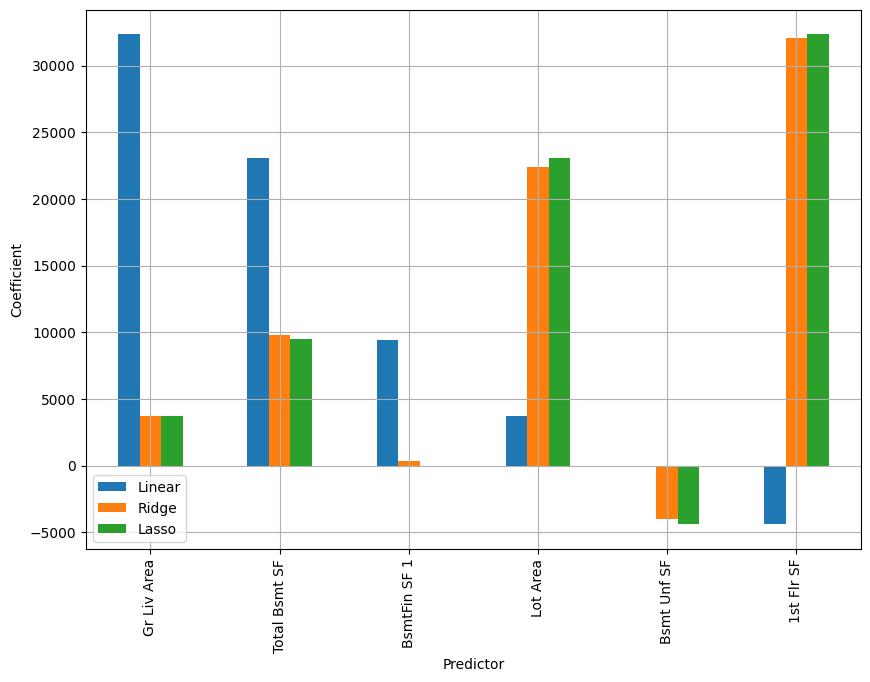

In [101]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (10,7))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

###Regression Models with 3 Selected Features

In [102]:
#Original X
# X = train_outdrop_lot[['Lot Area',	'BsmtFin SF 1',	'Bsmt Unf SF',	'Total Bsmt SF',	'1st Flr SF',	'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)

###Linear Regression 3 Feature

In [103]:
#Linear Regression top picks: 'Gr Liv Area', 'Total Bsmt SF', 'BsmtFin SF 1'
X = train_outdrop_lot[['Gr Liv Area', 'Total Bsmt SF', 'BsmtFin SF 1']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']
scaler = StandardScaler()
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [104]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(X_train, y_train)

In [105]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 33192.542728150926


In [106]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 30.13


In [107]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 35161.51145618721


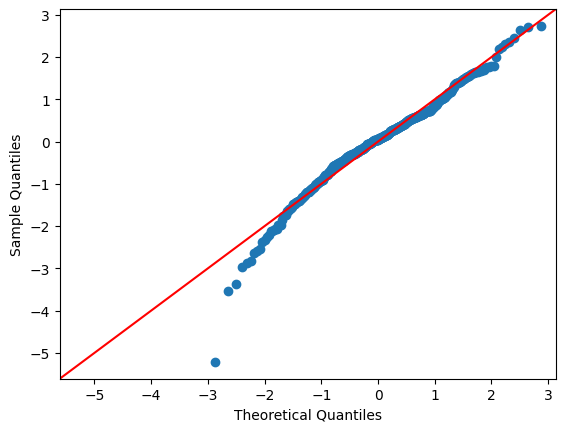

In [108]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

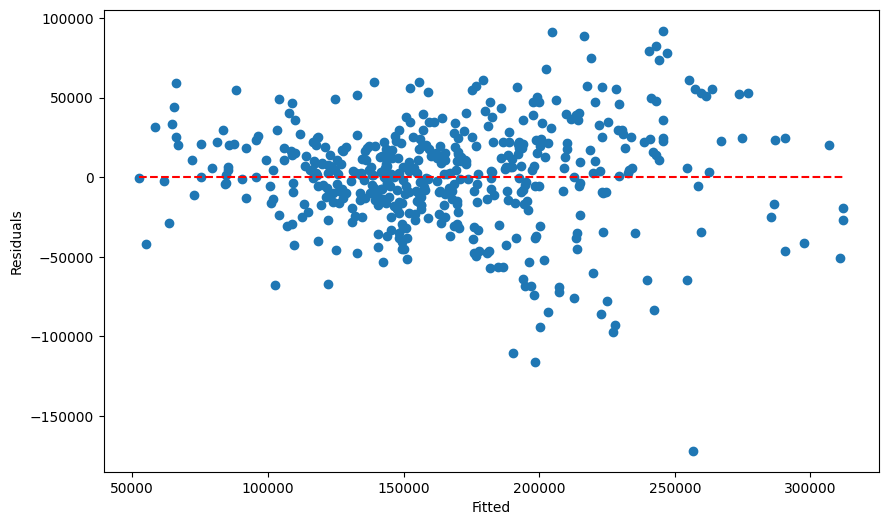

In [109]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

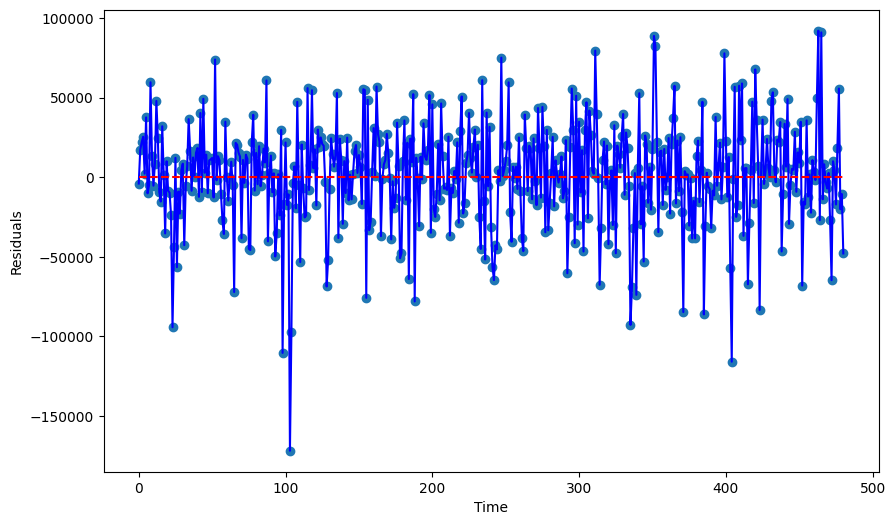

In [110]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

###Ridge Regression 3 Feature

In [111]:
#Ridge & Lasso Regression top picks: '1st Flr SF', 'Lot Area', 'Gr Liv Area' X'Total Bsmt SF' (but this is high corr w/ 1st Flr SF)
X = train_outdrop_lot[['1st Flr SF', 'Lot Area', 'Gr Liv Area']] # Example with multiple features (3 or 4 seems ideal, 2 is okay)
y = train_outdrop_lot['SalePrice']
#Split Data into Training and Testing Sets Use train_test_split() to divide your data.
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=5)

In [112]:
X# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(X_train, y_train) ;

In [113]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 37583.23265006383


In [114]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 42.66


In [115]:
# Specify values of alpha we want to try
alph = [1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 75, 100, 200, 300, 400, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_rr = Ridge(alpha = i) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_rr,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
      )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

      Alpha          RMSE
7     5.000  39454.852911
6     4.000  39454.861513
5     3.000  39454.875599
8    10.000  39454.891620
4     2.000  39454.895185
3     1.000  39454.920286
2     0.100  39454.947605
1     0.010  39454.950584
0     0.001  39454.950885
9    20.000  39455.371532
10   30.000  39456.375648
11   50.000  39459.898880
12   75.000  39467.002582
13  100.000  39476.918845
14  200.000  39541.188778
15  300.000  39637.790650
16  400.000  39759.261373
17  500.000  39899.912512


In [116]:
# Retrain the model w/ alpha = 10
my_fit_rr = Ridge(alpha = 10)
my_fit_rr.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_rr, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 39454.89162046178


In [117]:
# Calculate RMSE
y_pred = my_fit_rr.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 37586.30307841587


In [118]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 42.76


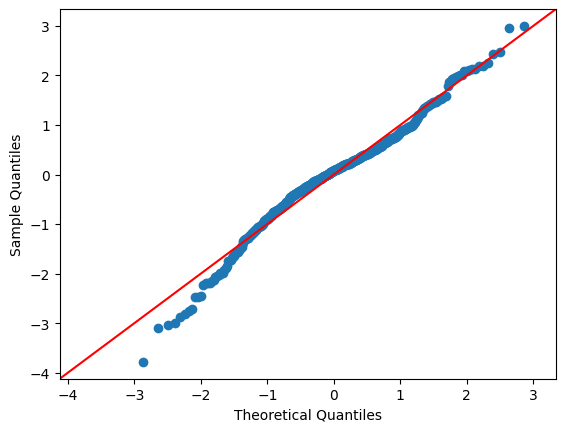

In [119]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

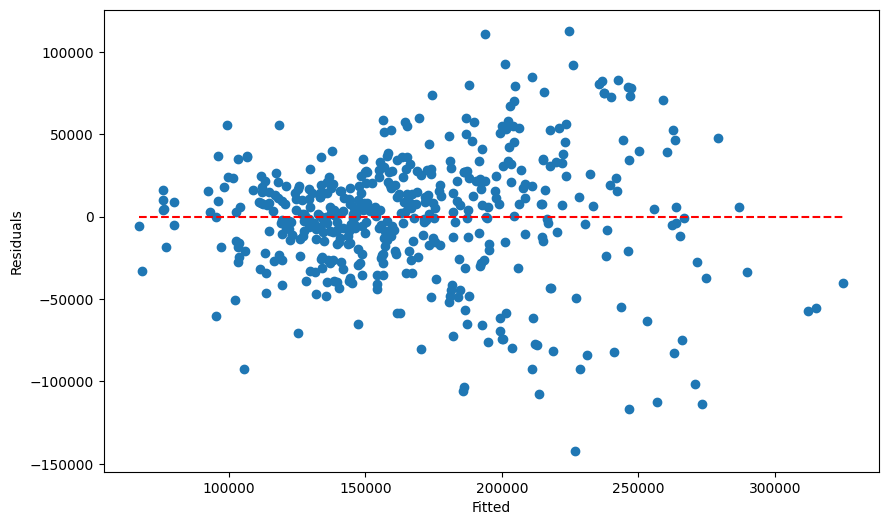

In [120]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

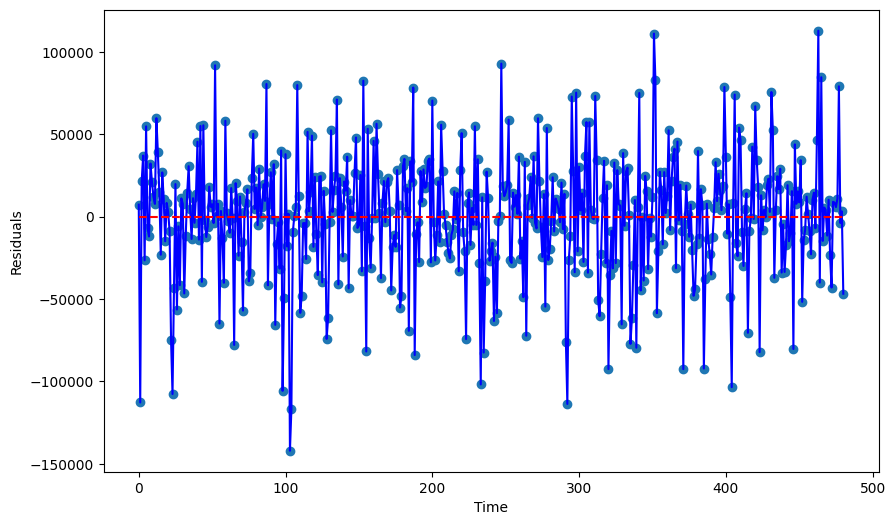

In [121]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

###Lasso Regression 3 Feature

In [122]:
# Specify values of alpha we want to try
alph = [1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 75, 100, 200, 300, 400, 500]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      X_scaled,
      y,
      scoring='neg_root_mean_squared_error',
      cv = 10
  )
  rmse = abs(results.mean())
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df.sort_values(by=['RMSE']))

      Alpha          RMSE
1     0.010  39454.950889
0     0.001  39454.950928
2     0.100  39454.951036
4     2.000  39454.951052
3     1.000  39454.951501
5     3.000  39454.951823
6     4.000  39454.952638
7     5.000  39454.953496
8    10.000  39454.953837
9    20.000  39454.967332
10   30.000  39454.985142
11   50.000  39455.028637
12   75.000  39455.117374
13  100.000  39455.233077
14  200.000  39456.041616
15  300.000  39457.242017
16  400.000  39458.873818
17  500.000  39460.936982


In [123]:
# Train the model
my_fit_lasso = Lasso(alpha = 30, tol = .01, max_iter=1000000)
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 39454.98514161402


In [124]:
# Calculate RMSE
y_pred = my_fit_lasso.predict(X_test)
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
print(f"RMSE: {rmse}")

RMSE: 37583.24918811494


In [125]:
rmspe = np.sqrt(np.mean(np.square((y_test - y_pred)/y_test)))*100
print(f"RMSPE: {rmspe:.2f}")

RMSPE: 42.65


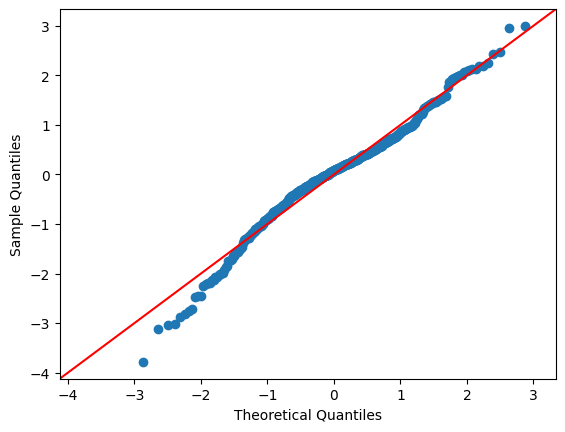

In [126]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

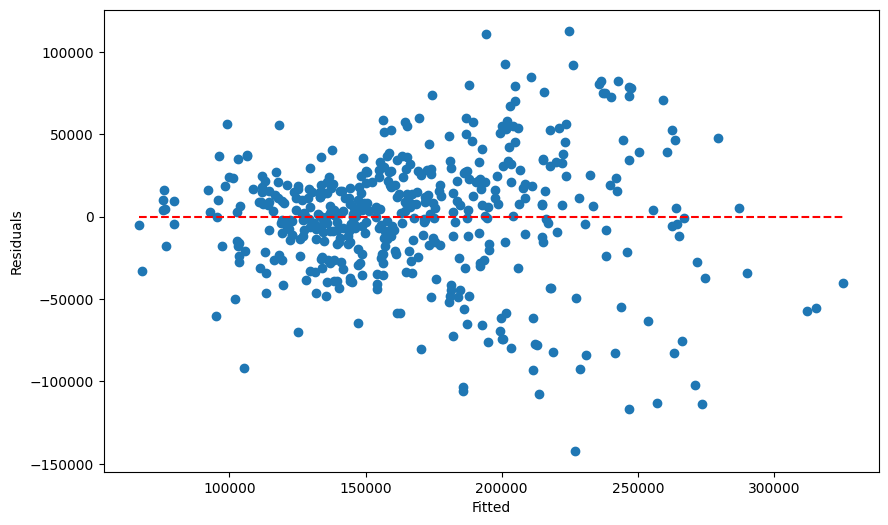

In [127]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

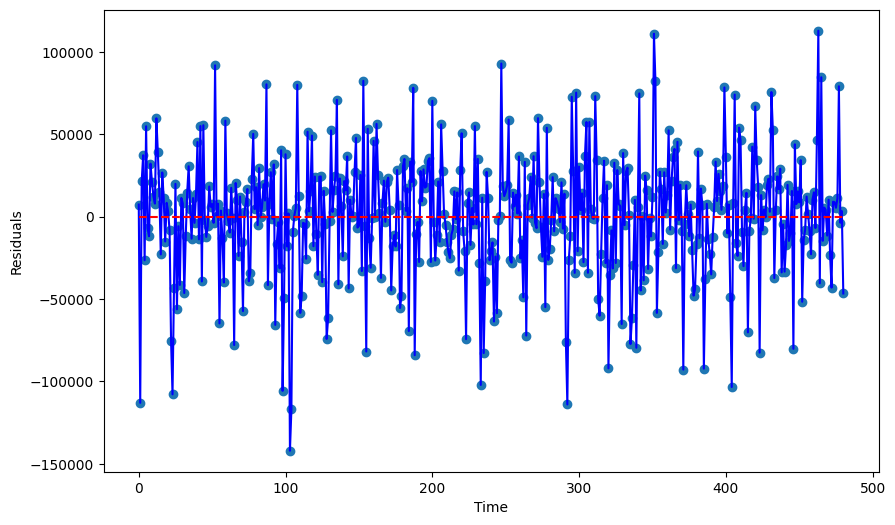

In [128]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

##Communicate the Results

Presentation:

##Upload Project 2 to Student Folder